Cấu trúc mạng VGG16:
- 13 lớp Convolution.
- 5 lớp max pooling.
- 3 lớp fully connected.
- 1 lớp softmax.

Chúng ta sẽ sử dụng phiên bản VGG16 48x48 để gọn nhẹ mô hình.

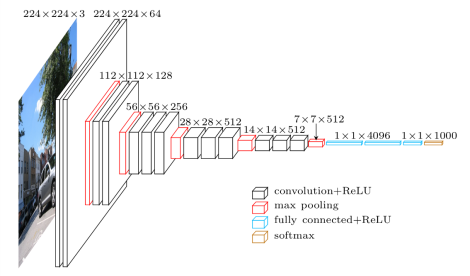



In [1]:
# Import các package cần thiết
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, MaxPool2D, Conv2D, Flatten, LeakyReLU, InputLayer
import numpy as np
import pandas as pd

In [2]:
# Load dữ liệu
%cd "/content/drive/My Drive/Fashion-MNIST/Dataset"
train_set = pd.read_csv("./fashion-mnist_train.csv").to_numpy()
test_set = pd.read_csv("./fashion-mnist_test.csv").to_numpy()

X_train = train_set[:,1:]
Y_train = train_set[:,0]

X_test = test_set[:,1:]
Y_test = test_set[:,0]

/content/drive/My Drive/Fashion-MNIST/Dataset


In [3]:
# Chuyển đổi ảnh thành ảnh 3 kênh màu
X_train=np.dstack([X_train] * 3)
X_test=np.dstack([X_test]*3)
X_train.shape,X_test.shape

((60000, 784, 3), (10000, 784, 3))

In [4]:
# Reshape ảnh
X_train = X_train.reshape(-1, 28,28,3)
X_test= X_test.reshape (-1,28,28,3)
X_train.shape,X_test.shape

((60000, 28, 28, 3), (10000, 28, 28, 3))

In [5]:
# Resize ảnh 48x48 theo yêu cầu của VGG16
from keras.preprocessing.image import img_to_array, array_to_img
X_train = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in X_train])
X_test = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in X_test])
#train_x = preprocess_input(x)
X_train.shape, X_test.shape

((60000, 48, 48, 3), (10000, 48, 48, 3))

In [6]:
# Chuẩn hóa dữ liệu và kiểu dữ liệu
X_train = X_train / 255.
X_test = X_test / 255.
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [7]:
from keras.utils import to_categorical
# Chuyển label sang dạng one hot coding
Y_train_one_hot = to_categorical(Y_train)
Y_test_one_hot = to_categorical(Y_test)

In [8]:
from sklearn.model_selection import train_test_split
# Chia tập train thành train và valid
X_train,X_valid,train_label,valid_label = train_test_split(X_train,
                                                           Y_train_one_hot,
                                                           test_size=0.2,
                                                           random_state=13
                                                           )

In [9]:
from keras.applications.vgg16 import preprocess_input
# Tiền xử lý dữ liệu
X_train = preprocess_input(X_train)
X_valid = preprocess_input(X_valid)
X_test  = preprocess_input (X_test)

In [10]:
# Xây dựng model
model = Sequential()
model.add(Conv2D(input_shape=(48,48,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))



In [11]:
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=10, activation="softmax"))


# model.add(Flatten())
# model.add(Dense(512, activation='relu', input_dim=(1*1*512)))
# model.add(LeakyReLU(alpha=0.1))
# model.add(Dense(10, activation='softmax'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 256)       2

In [14]:
# from keras.models import Model
# from keras import layers
# from keras import optimizers
# from keras import callbacks
# # Incorporating reduced learning and early stopping for callback
# reduce_learning = callbacks.ReduceLROnPlateau(
#     monitor='val_loss',
#     factor=0.2,
#     patience=2,
#     verbose=1,
#     mode='auto',
#     epsilon=0.0001,
#     cooldown=2,
#     min_lr=0)

# eary_stopping = callbacks.EarlyStopping(
#     monitor='val_loss',
#     min_delta=0,
#     patience=7,
#     verbose=1,
#     mode='auto')

# callbacks = [reduce_learning, eary_stopping]

In [ ]:
from keras.optimizers import Adam
# Compile the model.
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam())

In [20]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", 
                             monitor='val_acc', 
                             verbose=1, 
                             save_best_only=True, 
                             save_weights_only=False, 
                             mode='auto')
early = EarlyStopping(monitor='val_acc', 
                      min_delta=0, 
                      patience=20, 
                      verbose=1, 
                      mode='auto')
hist = model.fit(steps_per_epoch=len(X_train),
                 x=X_train,
                 y=train_label,
                 validation_data= (X_valid, valid_label), 
                 epochs=100,
                 callbacks=[checkpoint,early])

Epoch 1/100
47997/48000 [============================>.] - ETA: 0s - loss: 2.3034 - acc: 0.0992WARNING:tensorflow:Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0026s vs `on_test_batch_end` time: 0.0057s). Check your callbacks.

Epoch 00001: val_acc improved from -inf to 0.09867, saving model to vgg16_1.h5
48000/48000 [==============================] - 597s 12ms/step - loss: 2.3034 - acc: 0.0992 - val_loss: 2.3036 - val_acc: 0.0987
Epoch 2/100
47997/48000 [============================>.] - ETA: 0s - loss: 2.3034 - acc: 0.0975
Epoch 00002: val_acc did not improve from 0.09867
48000/48000 [==============================] - 597s 12ms/step - loss: 2.3034 - acc: 0.0975 - val_loss: 2.3039 - val_acc: 0.0983
Epoch 3/100
47997/48000 [============================>.] - ETA: 0s - loss: 2.3034 - acc: 0.1007
Epoch 00003: val_acc did not improve from 0.09867
48000/48000 [==============================] - 596s 12ms/step - loss: 2.3034 - acc: 0.1007 - val_loss: 2

In [ ]:
# # Huấn luyện mô hình
# from keras.callbacks import ModelCheckpoint, EarlyStopping
# checkpoint = ModelCheckpoint("/content/drive/My Drive/Fashion-MNIST/Weights/vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto')
# hist = model.fit(x=X_train,y=train_label, validation_data=(X_valid, valid_label), steps_per_epoch=48000, epochs=100, callbacks=callbacks)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history["acc"])
plt.plot(hist.history['val_acc'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [ ]:
# Dự đoán kết quả